### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report



In [7]:
df=pd.read_csv("customer_data.csv")

In [52]:
df.head()

,CustomerID,Age,Gender,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,Churn,AverageMonthlyCharges,CustomerLifetimeValue,ContractType_One year,ContractType_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,52,1,31.80,986.18,0,37,1,0,25.95,1269.41,False,False,False,False,False,False,False
1,2,42,1,30.47,1202.39,1,36,1,0,32.50,1341.31,False,False,True,False,False,True,False
2,3,54,1,20.00,1052.31,1,53,1,0,19.49,1306.68,False,True,False,False,False,False,False
3,4,67,1,94.53,671.46,0,4,1,0,134.29,836.18,False,False,False,True,False,False,False
4,5,41,1,94.83,2235.36,0,24,1,0,89.41,3194.76,False,False,False,False,False,True,False


In [21]:
df.shape

(5000, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             5000 non-null   int32  
 1   Age                    5000 non-null   int32  
 2   Gender                 5000 non-null   object 
 3   ContractType           5000 non-null   object 
 4   MonthlyCharges         5000 non-null   float64
 5   TotalCharges           5000 non-null   float64
 6   TechSupport            5000 non-null   object 
 7   InternetService        5000 non-null   object 
 8   Tenure                 5000 non-null   int32  
 9   PaperlessBilling       5000 non-null   object 
 10  PaymentMethod          5000 non-null   object 
 11  Churn                  5000 non-null   object 
 12  AverageMonthlyCharges  5000 non-null   float64
 13  CustomerLifetimeValue  5000 non-null   float64
dtypes: float64(4), int32(3), object(7)
memory usage: 488.4+ 

### EXPLORATORY DATA ANALYSIS

In [25]:
print("Statistics")
df.describe()

Statistics


,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,AverageMonthlyCharges,CustomerLifetimeValue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,44.778000,71.412160,2408.618934,33.636800,67.936490,3130.117042
std,1443.520003,14.288553,28.899349,1821.554447,19.905088,29.049335,2394.111548
min,1.000000,18.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,50.157500,1021.335000,17.000000,46.980000,1316.570000
50%,2500.500000,45.000000,70.980000,1882.300000,29.000000,67.345000,2444.855000
75%,3750.250000,54.000000,91.492500,3455.837500,51.000000,87.745000,4442.605000
max,5000.000000,80.000000,150.000000,10340.960000,72.000000,223.570000,14436.770000


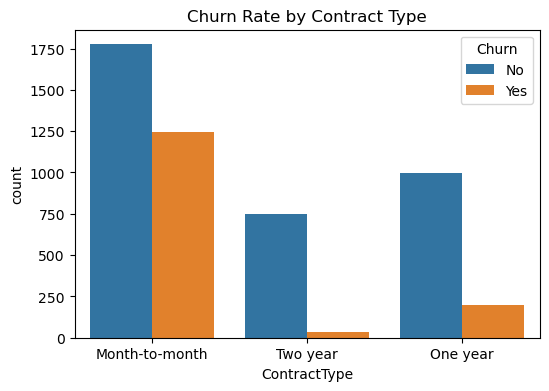

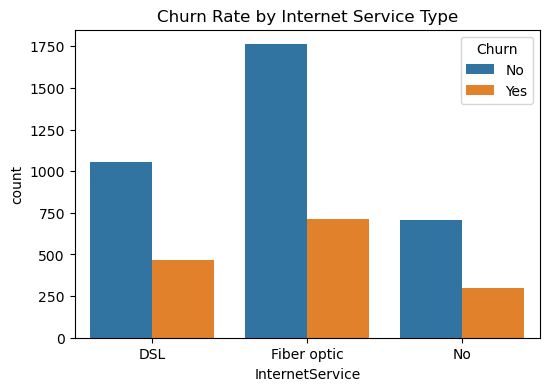

In [30]:
# Categorical Data Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ContractType', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.show()


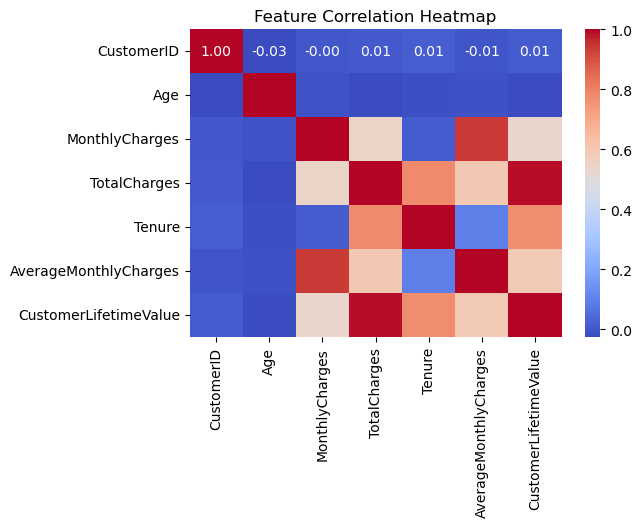

In [36]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

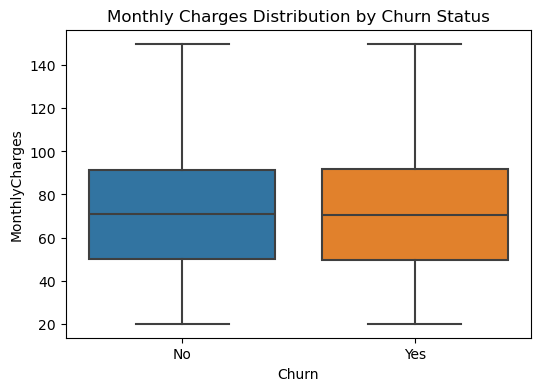

In [35]:
# Boxplot for Monthly Charges by Churn Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

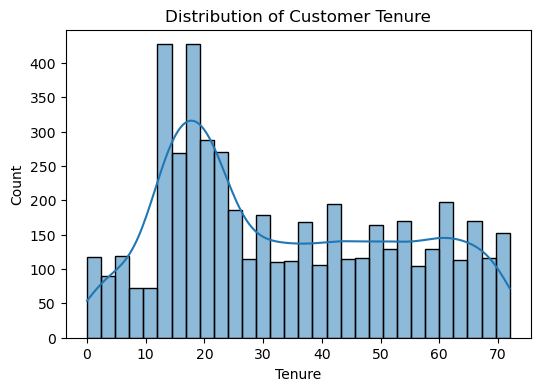

In [40]:
# Histogram for Tenure
plt.figure(figsize=(6, 4))
sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.show()

## Data preprocessing

In [ ]:
df.drop(columns="ContractTypeEncoded", inplace=True, errors='ignore')

In [42]:
print("Missing Values before handling:")
print(df.isnull().sum())

Missing Values before handling:
CustomerID               0
Age                      0
Gender                   0
ContractType             0
MonthlyCharges           0
TotalCharges             0
TechSupport              0
InternetService          0
Tenure                   0
PaperlessBilling         0
PaymentMethod            0
Churn                    0
AverageMonthlyCharges    0
CustomerLifetimeValue    0
dtype: int64


In [46]:
#Encode Categorical Features
categorical_cols = ['Gender', 'ContractType', 'TechSupport', 'InternetService',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

In [49]:
# Label Encoding for binary categorical variables
label_encoders = {}
for col in ['Gender', 'TechSupport', 'PaperlessBilling', 'Churn']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [50]:
# One-Hot Encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=['ContractType', 'InternetService', 'PaymentMethod'], drop_first=True)

In [51]:
df.dtypes

CustomerID                          int32
Age                                 int32
Gender                              int32
MonthlyCharges                    float64
TotalCharges                      float64
TechSupport                         int32
Tenure                              int32
PaperlessBilling                    int32
Churn                               int32
AverageMonthlyCharges             float64
CustomerLifetimeValue             float64
ContractType_One year                bool
ContractType_Two year                bool
InternetService_Fiber optic          bool
InternetService_No                   bool
PaymentMethod_Credit card            bool
PaymentMethod_Electronic check       bool
PaymentMethod_Mailed check           bool
dtype: object

## Model Building

In [54]:
# Step 3: Split Dataset into Training, Validation, and Testing Sets
X = df.drop(columns=['CustomerID', 'Churn'])  # Features
y = df['Churn']  # Target variable

In [55]:

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Training Set: (3500, 16), Validation Set: (750, 16), Test Set: (750, 16)


In [58]:

# Train XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_val)
y_prob = xgb_model.predict_proba(X_val)[:, 1]

### Model Evalution

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)

0.6550726863226863

In [62]:
print(f"✅ XGBoost Accuracy: {accuracy:.4f}")
print(f"✅ XGBoost AUC Score: {auc:.4f}")
print(classification_report(y_val, y_pred))

✅ XGBoost Accuracy: 0.6560
✅ XGBoost AUC Score: 0.6551
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       528
           1       0.39      0.29      0.34       222

    accuracy                           0.66       750
   macro avg       0.56      0.55      0.55       750
weighted avg       0.63      0.66      0.64       750



###  Hyperparameter Tuning for XGBoost

In [63]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0]
}

# Perform hyperparameter tuning
xgb_tuned = RandomizedSearchCV(xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                               param_grid, cv=5, n_iter=10, scoring='roc_auc', random_state=42)
xgb_tuned.fit(X_train, y_train)

# Best Model
best_xgb = xgb_tuned.best_estimator_

# Predictions on Test Set
y_pred_test = best_xgb.predict(X_test)
y_prob_test = best_xgb.predict_proba(X_test)[:, 1]

In [71]:
# Final Evaluation
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_prob_test)

print(f"Best XGBoost Accuracy: {accuracy_test:.4f}")
print(f"Best XGBoost AUC Score: {auc_test:.4f}")
print(classification_report(y_test, y_pred_test))

Best XGBoost Accuracy: 0.7053
Best XGBoost AUC Score: 0.6592
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       529
           1       0.00      0.00      0.00       221

    accuracy                           0.71       750
   macro avg       0.35      0.50      0.41       750
weighted avg       0.50      0.71      0.58       750



In [72]:
#blancing the  dataset priority to minority class
model = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


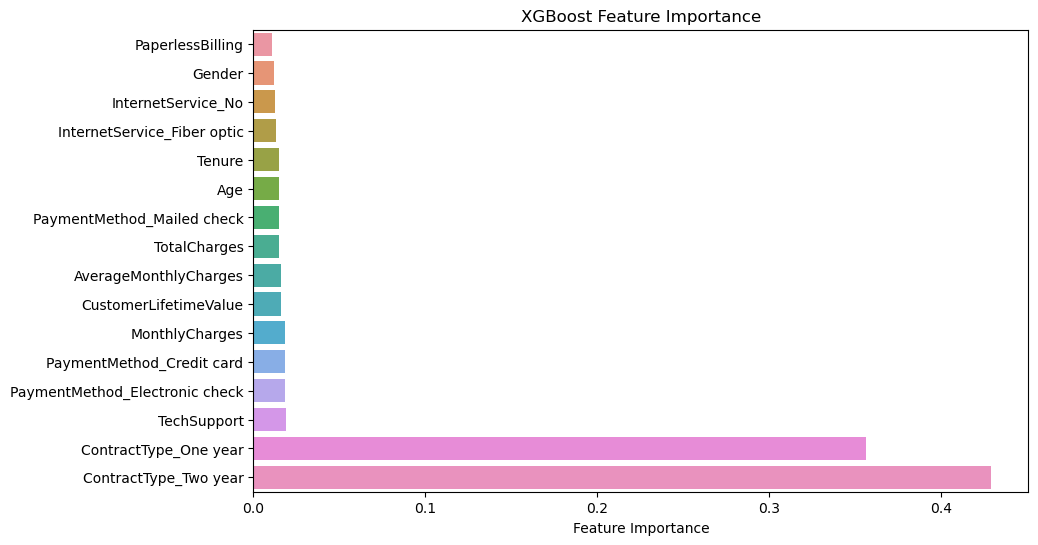

In [74]:
# Get feature importance
feature_importance = best_xgb.feature_importances_
features = X.columns

# Sort by importance
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

## Model Deployment

In [86]:

# Save the trained model
joblib.dump(best_xgb, 'xgboost_churn_model.pkl')
# Load the model for future use
loaded_model = joblib.load('xgboost_churn_model.pkl')


In [80]:
# # Predict on new data
# new_customer_data = X_test.iloc[0:1]  # Example input
# churn_prediction = loaded_model.predict(new_customer_data)
# print(f"Predicted Churn: {churn_prediction[0]}")
# predictions = loaded_model.predict(X_test[:10])
# print(predictions)
# probabilities = loaded_model.predict_proba(X_test[:10])
# print(probabilities)

In [ ]:
churn_prediction, churn_prob = predict_churn(input_data)
print(f"Churn Prediction: {churn_prediction}, Probability: {churn_prob}")


Churn Prediction: 0, Probability: 0.24589893221855164
